Лабораторна робота №5

Завантажте набір даних по медичному страхуванню за посиланням

За рахунок зміни гіперпараметрів нейронної мережі спробуйте досягнути найменшого значення функції втрат (mae).

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Epoch 1/200
17/17 [==============================] - 1s 9ms/step - loss: 13345.9688 - val_loss: 12968.1162
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 13345.8125 - val_loss: 12967.9521
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 13345.6309 - val_loss: 12967.7627
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 13345.4199 - val_loss: 12967.5391
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 13345.1738 - val_loss: 12967.2764
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 13344.8

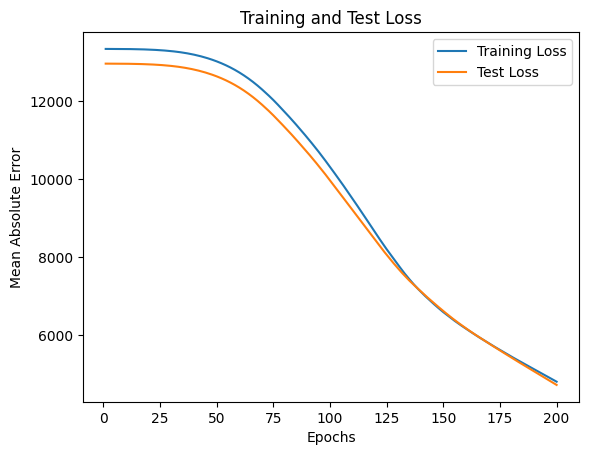

9/9 [==============================] - 0s 1ms/step
--------------------------------------------------------------------
Mean Absolute Error on Test Set: 4716.624147476154


In [10]:
# Імпортуємо необхідні бібліотеки
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Завантаження даних з CSV-файлу
data = pd.read_csv('./medical_insurance.csv')

# Перевірка даних та їхньої структури
print(data.head())
print()

# Обробка категоріальних змінних (стать, куріння, регіон)
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['region'] = label_encoder.fit_transform(data['region'])

# Розділення даних на ознаки та цільову змінну
X = data.drop('charges', axis=1)
y = data['charges']

# Розділення даних на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Нормалізація ознак
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ...

# Побудова моделі нейронної мережі зі зміненими гіперпараметрами
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Компіляція моделі зі зменшеною швидкістю навчання
model.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.0001))

# Тренування моделі
model.fit(X_train, y_train, epochs=200, batch_size=64,
          validation_data=(X_test, y_test))


# Оцінка та візуалізація результатів навчання
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

# Візуалізація функції втрат на тренувальному та тестовому наборах
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

# Оцінка моделі на тестовому наборі
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print('--------------------------------------------------------------------')
print(f'Mean Absolute Error on Test Set: {mae}')